In [2]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2024-07-04 16:54:21,995][WARNING]: MySQL server has gone away. Reconnecting to the server.


In [4]:
# ANIMALS
ANIMAL_IDS = ["R013", "R014", "R015"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=30)
few_days_ago = (datetime.today() - timedelta(days=5)).strftime("%Y-%m-%d")
today = datetime.today().date()

In [5]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 29 sessions for R013 between 2024-06-04 and 2024-07-03
fetched 26 sessions for R014 between 2024-06-04 and 2024-07-02
fetched 28 sessions for R015 between 2024-06-04 and 2024-07-03


In [6]:
days_df = create_days_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max, verbose=True
)

Fetched data from SessionAggDate table from 2024-06-04 to 2024-07-03  
No new data from today, 2024-07-04 to add to SessionAggDate.

84 daily summaries fetched for animals: 
['R013', 'R014', 'R015']
between 2024-06-04 and 2024-07-03


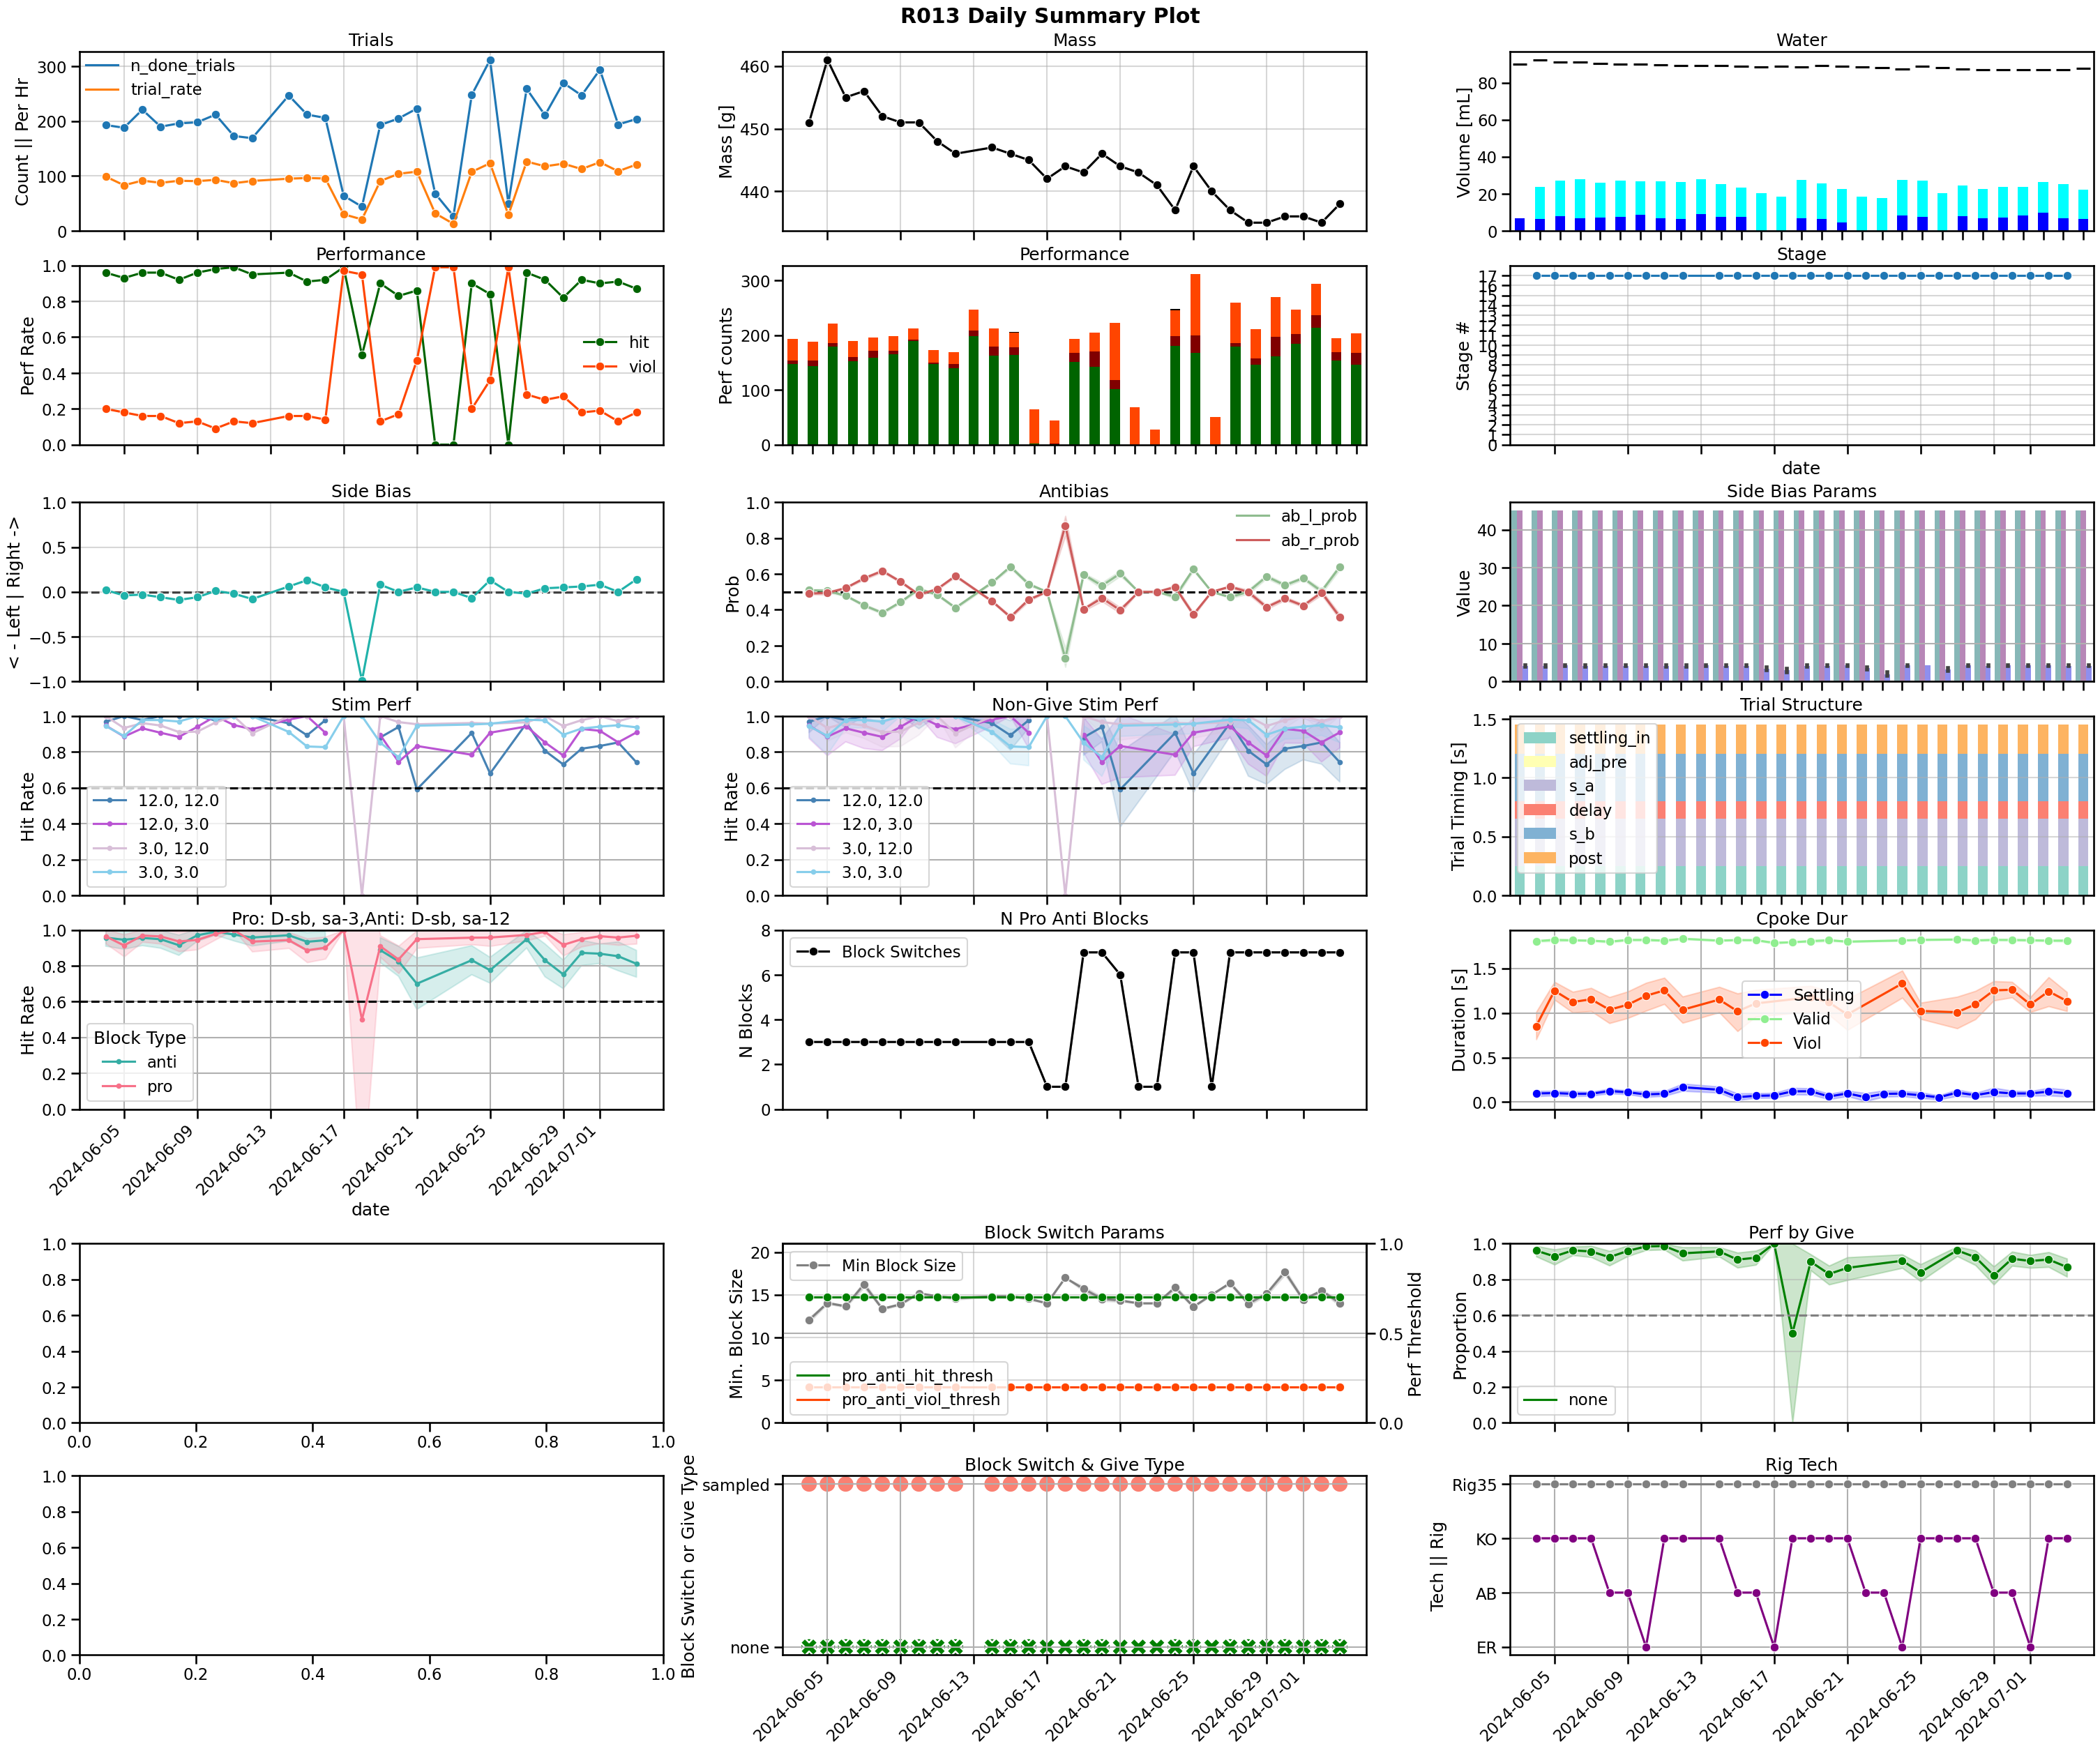

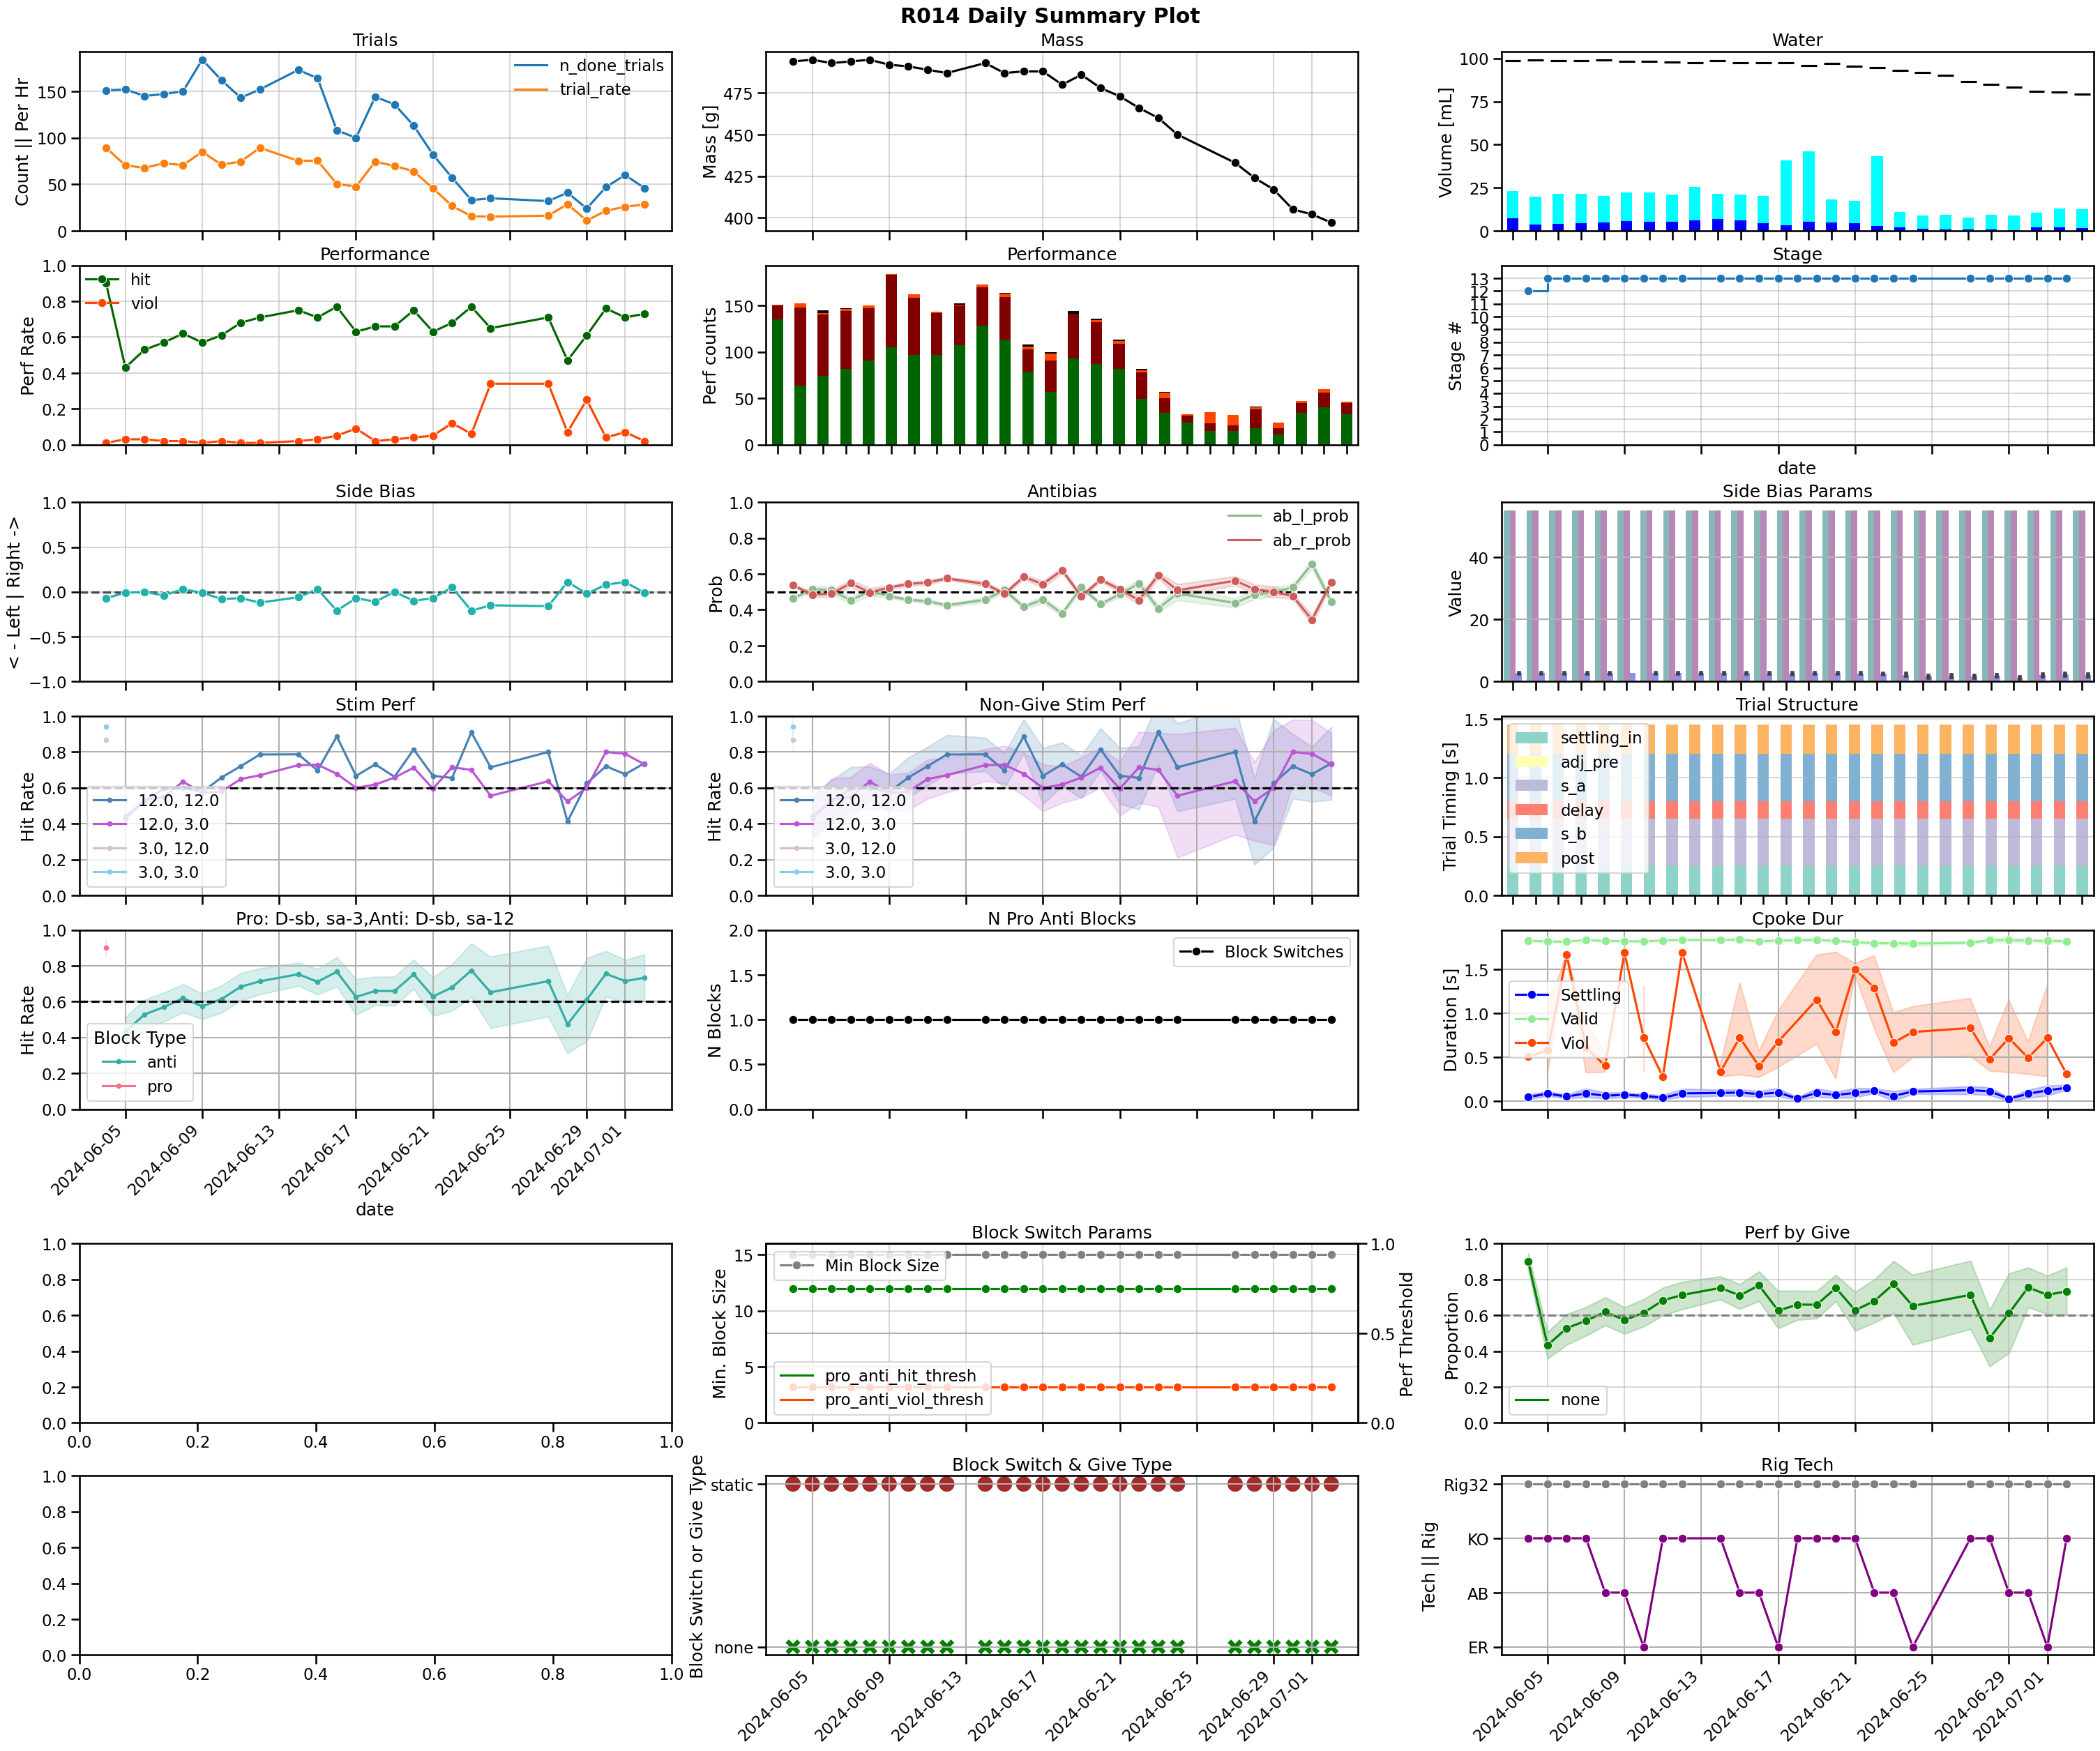

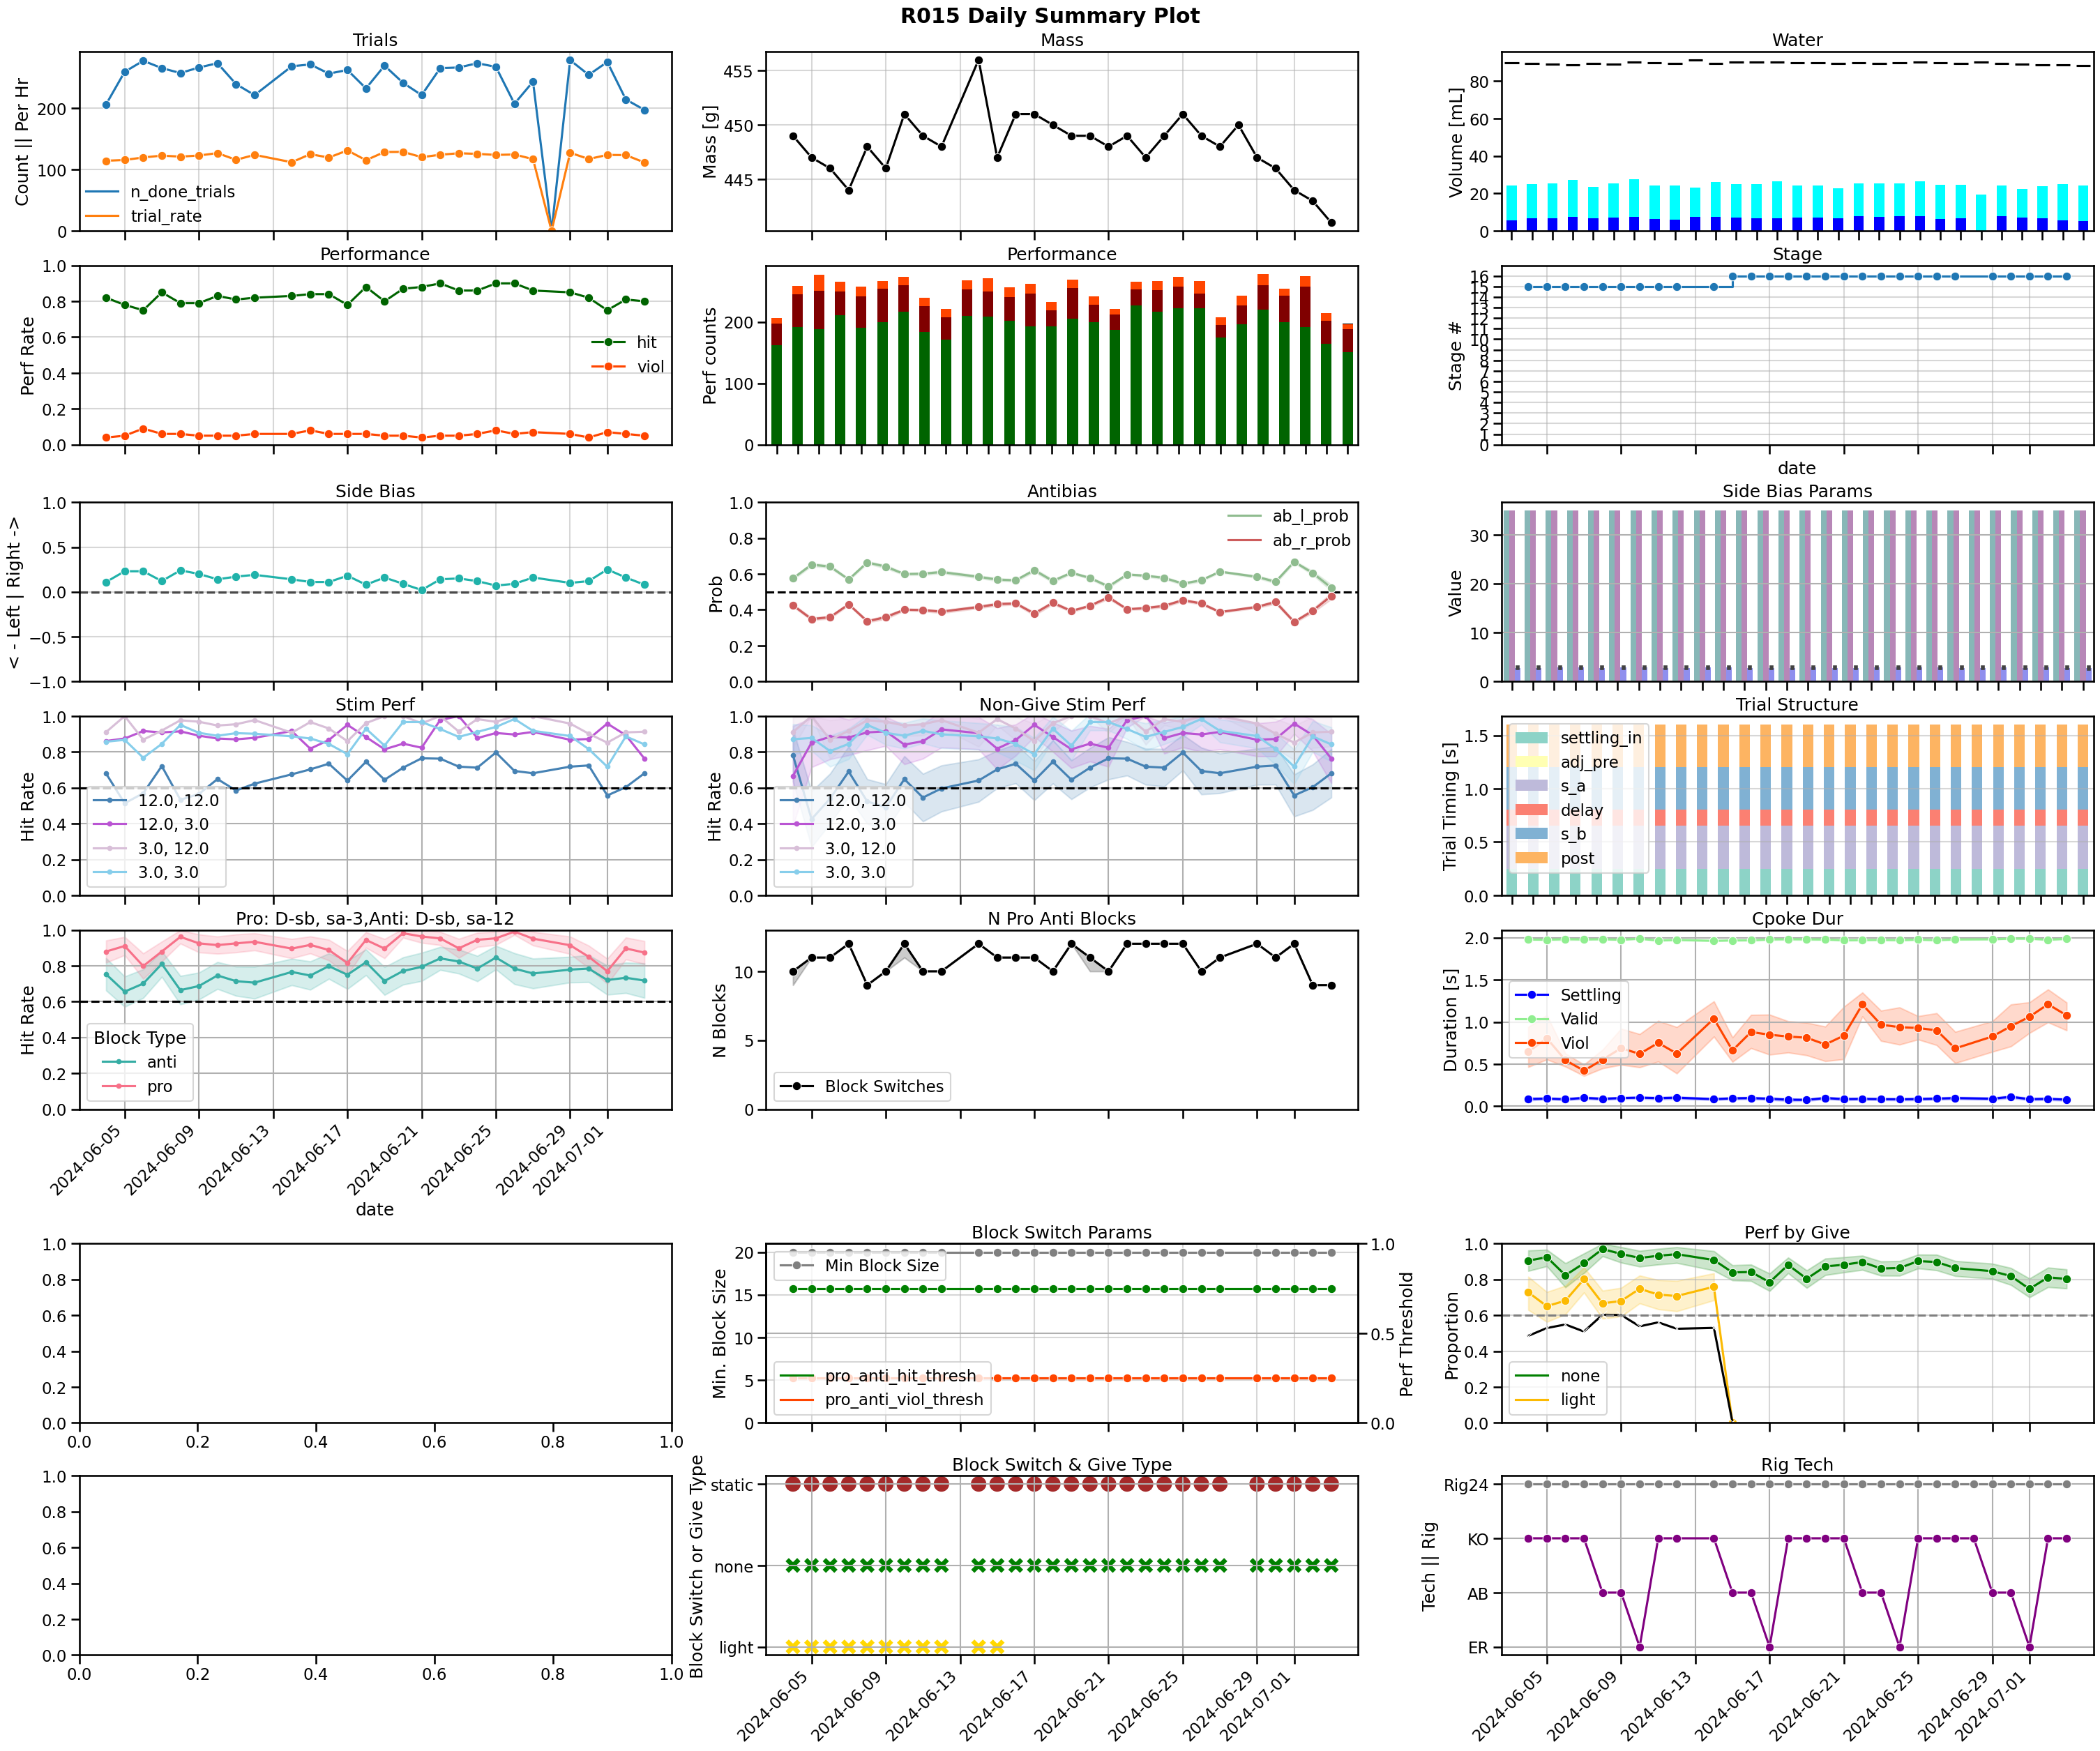

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(animal_id, animal_days_df, animal_trials_df)

In [15]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R013_2024-06-28_day_summary
['s_a', 's_b', 'post', 'go']
making R014_2024-06-28_day_summary
['s_a']
